# Exercise 2
## Alessandro Rizzi, Marvin Wolf & Matteo Zortea: Group G3-A8
### Task solved:
Ex 2 a) b) c) d)

### (a)
We correct the backpropagate function:

In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import expit
from scipy.misc import derivative


In [125]:
def propagate(X, V, W, b):
    if isinstance(X, (int, float)):
        X = np.array([X])
    U1 = np.einsum("ij,j->i", V, X) + b
    Z = f_act(U1)
    U2 = np.einsum("ij,j->i", W, Z)
    Y = U2
    return Y, Z, U1, U2

def backpropagate(X, YT, V, W, b):
    Y, Z, U1, U2 = propagate(X, V, W, b)
    # output layer
    ##########################################
    delta3 = -(Y - YT) # error layer 3
    delta2 = np.einsum("ij,i->j", W, delta3) * f_act_prime(U1) # error layer 2
    dW = np.einsum("i,j->ij", delta3, Z)
    dV = np.einsum("i,j->ij", delta2, X)
    db = delta2              
    ##########################################
    return db, dV, dW, Cost(Y,YT)

relu = lambda v: np.maximum(v, 0.0)
relu_prime = lambda v: np.where(v>0.0, np.ones_like(v), np.zeros_like(v))
f_act = relu
f_act_prime = relu_prime

Cost = lambda Y, YT: 1./2. * np.mean((Y - YT)**2)

In [126]:
def train(X, YT, V, W, b, niter=10000, base_lr=0.2):
    """
    data                             X
    target values                    YT
    input->hidden weights            V
    hidden->output weights           W
    hidden biases                    b
    number of training iterations    niter
    learning rate                    base_lr
    """
    SEED = 734589
    np.random.seed(SEED)

    K = len(b)
    eta = base_lr / K
    mu = 0.5
    T = np.random.randint(0, len(X), niter)

    cost = np.zeros(len(T))
    # prepare momentum term variables
    delta_W = np.zeros((1, K))
    delta_b = np.zeros(K)
    delta_V = np.zeros((K, 1))

    for run, inp in enumerate(T):
        if isinstance(X[inp], (int, float)):
            db, dV, dW, cost[run] = backpropagate([X[inp]], YT[inp], V, W, b)
        else:
            db, dV, dW, cost[run] = backpropagate(X[inp], YT[inp], V, W, b)
        # calculate weight update with momentum
        # instead of applying the gradients directly
        # this applies a low-pass filtered version
        # which smooths out the updates and helps
        # stabilise the training
        # https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Momentum
        delta_b = (1.-mu) * db + mu * delta_b
        delta_V = (1.-mu) * dV + mu * delta_V
        delta_W = (1.-mu) * dW + mu * delta_W
        # update weights
        b += eta * delta_b
        V += eta * delta_V
        W += eta * delta_W
    
    return V, W, b, cost

We now see if the parameters change and plot the cost:

In [127]:
data = np.load("resources/xor_data.npz")
X = data['inp']
YT = data['out']

V = np.array([[1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])
W = np.array([[1.0, -2.0, 1.0]])
b = np.array([0.0, -1.0, 0.0])
K = 3 # number of hidden neurons

# Coopy array values for comparison at the end
V0 = np.copy(V)
W0 = np.copy(W)
b0 = np.copy(b)

# Training
V, W, b, cost = train(X, YT, V, W, b, niter=10000)

# Compare parameters
print("Parameters:")
print("V:", V)
print("W:", W)
print("b:", b)
print("\n\n")
print("Variation in the parameters:")
print("DeltaV:", np.abs(V-V0))
print("DeltaW:", np.abs(W-W0))
print("Deltab:", np.abs(b-b0))
print("\n\n")
print("Average cost last 50 steps:", np.average(cost[-50:]))

Parameters:
V: [[1. 0.]
 [1. 1.]
 [0. 1.]]
W: [[ 1. -2.  1.]]
b: [ 0. -1.  0.]



Variation in the parameters:
DeltaV: [[0. 0.]
 [0. 0.]
 [0. 0.]]
DeltaW: [[0. 0. 0.]]
Deltab: [0. 0. 0.]



Average cost last 50 steps: 0.0


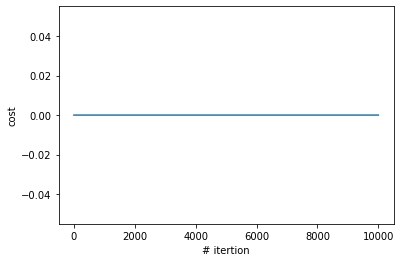

In [128]:
plt.plot(range(len(cost)), cost)
plt.xlabel('# itertion')
plt.ylabel('cost')
plt.show()

### (b)

Let us now vary one parameter

In [129]:
V = np.array([[1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])
W = np.array([[1.0, -2.0, 1.0]])
b = np.array([0.0, -1.0, 0.0])

#change of the first wheight W_1 
W[0,0] = 4

In [130]:
V, W, b, cost = train(X, YT, V, W, b, niter=100000, base_lr=0.2)

In [131]:
print("Parameters:")
print("V:", V)
print("W:", W)
print("b:", b)
print("\n\n")
print("Variation in the parameters:")
print("DeltaV:", np.abs(V-V0))
print("DeltaW:", np.abs(W-W0))
print("Deltab:", np.abs(b-b0))
print("\n\n")
print("Average cost last 50 steps:", np.average(cost[-50:]))

Parameters:
V: [[0.2572     0.        ]
 [1.00398639 1.00398639]
 [0.8505479  0.8505479 ]]
W: [[ 3.80293333 -1.99205888  1.17571273]]
b: [-7.42800000e-01 -1.00398639e+00  6.07398696e-16]



Variation in the parameters:
DeltaV: [[0.7428     0.        ]
 [0.00398639 0.00398639]
 [0.8505479  0.1494521 ]]
DeltaW: [[2.80293333 0.00794112 0.17571273]]
Deltab: [7.42800000e-01 3.98639059e-03 6.07398696e-16]



Average cost last 50 steps: 1.0849597234784045e-31


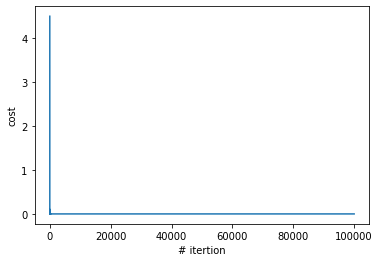

In [132]:
plt.plot(range(len(cost)), cost)
plt.xlabel('# itertion')
plt.ylabel('cost')
plt.show()

We can see that even if we didn't recover exactely the same initial parameters, we obtain in the end a null cust. We cannot be sure that we are correctly implementing a XOR gate, because we are evaluating the cost on the same test used for training. One should test the network on a different set in order to be sure not to have just overfitted the training dataset.  

### (C)
We start with loading the dataset and with defining the non-linearity and its derivative:

In [133]:
data = np.load("resources/func_approx_training.npz")
X = data['X']
YT = data['Y']

expit_derivative = lambda x: expit(x) * (1-expit(x))
f_act = expit
f_act_prime = expit_derivative

In [134]:
K = 5

#random initialization of the weights
V = np.random.normal(0., 1., (K,1))
W = np.random.normal(0., 1., (1,K))
b = np.random.normal(0., 1., K)

Average cost last 50 steps: 0.13511729007897963


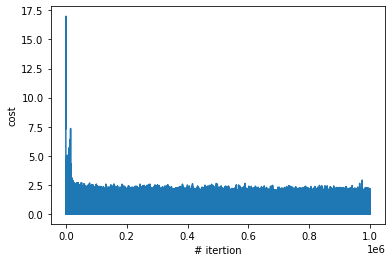

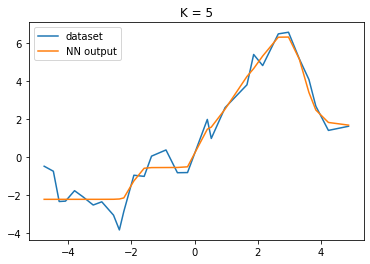

In [135]:
V, W, b, cost5 = train(X, YT, V, W, b, niter=int(1e6),base_lr=0.1)
avgcost = [np.mean(cost5[n-10:n+10]) for n in range(10, len(cost5)-10)]
print("Average cost last 50 steps:", np.average(cost5[-50:]))
plt.plot(range(int(1e6)), cost5)
plt.xlabel('# itertion')
plt.ylabel('cost')
plt.show()

yval = []
for xval in X:
    yval.append(propagate(xval, V, W, b)[0])
cost_5 =  Cost(yval,YT)

plt.plot(X, YT, label = 'dataset')
plt.plot(X, yval, label = 'NN output')
plt.title('K = 5')
plt.legend()
plt.show()

We see that after an initial drop, the cost remains averagely constant. We now try with K = 40.

In [136]:
K = 40

#random initialization of the weights
V = np.random.normal(0., 1., (K,1))
W = np.random.normal(0., 1., (1,K))
b = np.random.normal(0., 1., K)

Average cost last 50 steps: 0.09952037597681562


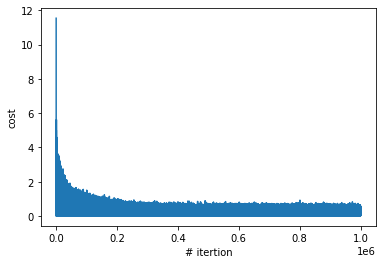

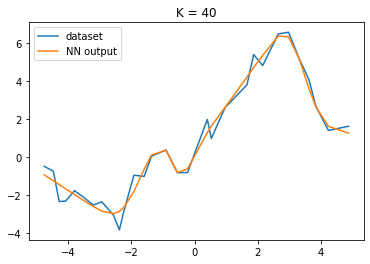

In [137]:
V, W, b, cost40 = train(X, YT, V, W, b, niter=int(1e6),base_lr=0.1)
avgcost = [np.mean(cost40[n-10:n+10]) for n in range(10, len(cost40)-10)]
print("Average cost last 50 steps:", np.average(cost40[-50:]))
plt.plot(range(int(1e6)), cost40)
plt.xlabel('# itertion')
plt.ylabel('cost')
plt.show()

yval = []
for xval in X:
    yval.append(propagate(xval, V, W, b)[0])
cost_40 = Cost(yval,YT)

plt.plot(X, YT, label = 'dataset')
plt.plot(X, yval, label = 'NN output')
plt.title('K = 40')
plt.legend()
plt.show()

The result with 40 hidden units is evidently better. We can also see that the average cost is siglificantly less than the K=5 case

### (d)

In [138]:
data = np.load("resources/bar_data.npz")
X = data['inp']
YT = data['out']
K = 10

V = np.random.normal(0., 1., (K,25))
W = np.random.normal(0., 1., (2,K))
b = np.random.normal(0., 1., K)

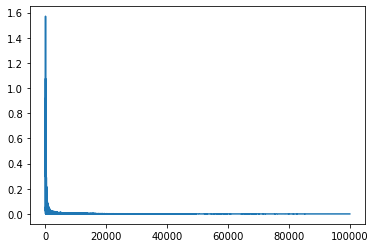

In [139]:
V, W, b, cost = train(X, YT, V, W, b, niter=int(1e5))
plt.plot(range(int(1e5)), cost)
plt.show()

yval = []
for xval in X:
    yval.append(propagate(xval, V, W, b)[0])

[0.7022768  0.09632364]


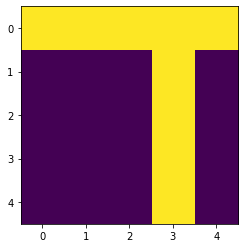

[0.49827292 0.10086758]


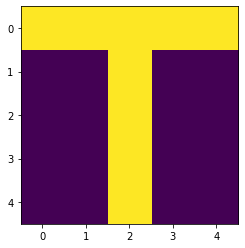

[0.09979604 0.70406862]


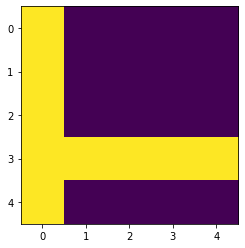

In [140]:
ntests = 3
for _ in range(ntests):
    idx = np.random.randint(0,len(X))
    plt.imshow(X[idx].reshape(5,5))
    print(propagate(X[idx], V, W, b)[0])
    plt.show()

The output of $y_1,y_2$ indicates the coordinates of the center of the cross. Horizontally goes from the left (0.0) to the right (1.0), while vertically it goes from the top (0.0) to the bottom (1.0).